#### Unsupervised learning

1) Lables are not defined.<br>
2) Only Input features are provided as given data. 


### K-Means Clustering Algorithm

1) Specify number of clusters K.<br>
2) Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.<br>
3) Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.<br>
4) Compute the sum of the squared distance between data points and all centroids.<br>
5) Assign each data point to the closest cluster (centroid).<br>
6) Compute the centroids for the clusters by taking the mean(average) of the all data points that belong to each cluster.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df=pd.read_csv('//content//drive//My Drive//A_Om Kant Sharma//customers.csv',encoding='latin1') 


In [ ]:
df.sample(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
9,10,Female,30,19,72
105,106,Female,21,62,42
188,189,Female,41,103,17
24,25,Female,54,28,14
137,138,Male,32,73,73
152,153,Female,44,78,20
172,173,Male,36,87,10
199,200,Male,30,137,83
52,53,Female,31,43,54
145,146,Male,28,77,97


In [ ]:
df.shape

(200, 5)

In [42]:
df.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Class,Class_with_K3,Class_with_K7
180,181,Female,37,97,32,3,2,0
118,119,Female,51,67,43,0,1,2
57,58,Male,69,44,46,0,1,2
109,110,Male,66,63,48,0,1,2
174,175,Female,52,88,13,3,2,3


In [ ]:
# Assume, we chose K=3, as initial number of clusters
# k1(86,20)
# k2(93,14)
# k3(17,76)
# d((x1,x2),(y1,y2)) = ((y2-y1)^2 + (x2-x1)^2))*(0.5)

# d(k1,(79,83)) = x  
# d(k2,(79,83)) = y 
# d(k3,(79,83)) = z
# Assume x<y and x<z
# (79,83) is assigned to cluster k1 with centroid (86,20) as x<y and x<z
# k1_new_centroid = (86+79)/2, (20+83)/2 = (155/2, 103/2) = (77.5,51.5)
# centroid of k1 is now (17.5,39)

#  Cluster name           - centroid           record no(row) in that cluster
# k1 {1(86,20),4(79,83)}   - 77.5,51.5           {1,4}
# k2 {2(93,14)}            - 93,14               {2}
# k3 {3(17,76)}            - 17,76               {3}


In [ ]:
df.shape

(200, 5)

In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
x = df.iloc[:, [3, 4]].values
type(x)

numpy.ndarray

In [ ]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
print(x.shape)

(200, 2)


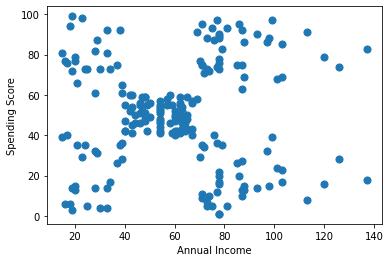

In [ ]:
plt.scatter(x[:, 0], x[:, 1], s=50)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
# plt.scatter([25,45,95],[30,55,80],color='red',marker='*',s=100)
plt.show()

### Elbow method to determine the best K for K-Means

Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion

In [ ]:
from sklearn.cluster import KMeans

[269981.28, 181665.82312925172, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347, 30241.34361793659, 24995.96978113596, 21841.978256748633, 19657.783608703958, 17901.212513132865, 16077.489277910578, 14437.201795784862, 13498.99006878637, 12088.123035298035, 10846.353790069581, 10036.144179395093, 9296.084307359308, 8630.772253591818, 8473.279492126232]


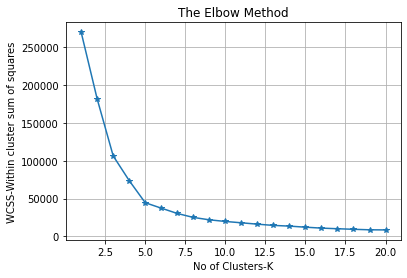

In [ ]:
# wcss = within cluster sum of square
wcss = []
for i in range(1, 21): # i = 1-20
    cls = KMeans(n_clusters=i)
    cls.fit(x)
    wcss.append(cls.inertia_) # inertia is another name for wcss

print(wcss)
plt.plot(range(1, 21), wcss,marker='*')
plt.title('The Elbow Method')
plt.xlabel('No of Clusters-K')
plt.ylabel('WCSS-Within cluster sum of squares')
plt.grid()
plt.show()

In [ ]:
# optimal k = 5 (from the above graph)
kmean = KMeans(n_clusters=5) # [cluster no.s - 0 to 4]
kmean.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_kmeans = kmean.predict(x)

In [ ]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [ ]:
print(kmean.cluster_centers_)
type(kmean.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


numpy.ndarray

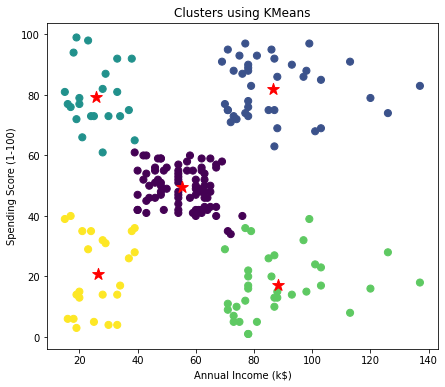

In [ ]:
fig = plt.figure(figsize=(7, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, marker='*')
plt.title('Clusters using KMeans')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
df['Class'] = kmean.predict(x)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Class
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [ ]:
df['Class'].value_counts()

0    81
1    39
3    35
4    23
2    22
Name: Class, dtype: int64

#### K-Means with K=3

In [ ]:
kmean3 = KMeans(n_clusters=3)
kmean3.fit(x)
y_kmean3 = kmean3.predict(x)
y_kmean3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [ ]:
# cluster_centers_ represent cluster centorids
print(kmean3.cluster_centers_)

[[86.53846154 82.12820513]
 [44.15447154 49.82926829]
 [87.         18.63157895]]


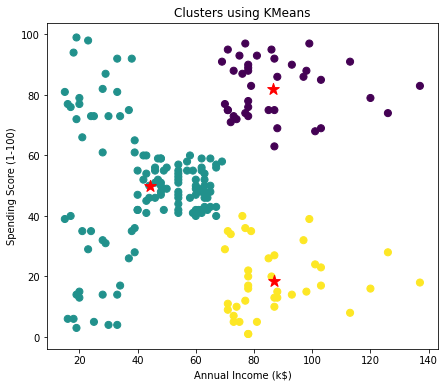

In [ ]:
fig = plt.figure(figsize=(7, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_kmean3, s=50, cmap='viridis')

centers = kmean3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, marker='*')
plt.title('Clusters using KMeans')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
df['Class_with_K3'] = kmean3.predict(x)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Class,Class_with_K3
0,1,Male,19,15,39,4,1
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,4,1
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,4,1


In [ ]:
df['Class_with_K3'].value_counts()

1    123
0     39
2     38
Name: Class_with_K3, dtype: int64

#### K-Mean with K=7

In [ ]:
kmean7 = KMeans(n_clusters=7)
kmean7.fit(x)
y_kmean7 = kmean7.predict(x)
y_kmean7

array([5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 2,
       5, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6,
       0, 6], dtype=int32)

In [ ]:
print(kmean7.cluster_centers_)

[[109.7         22.        ]
 [ 25.72727273  79.36363636]
 [ 54.88607595  49.89873418]
 [ 79.          16.59259259]
 [ 78.03571429  81.89285714]
 [ 26.30434783  20.91304348]
 [108.18181818  82.72727273]]


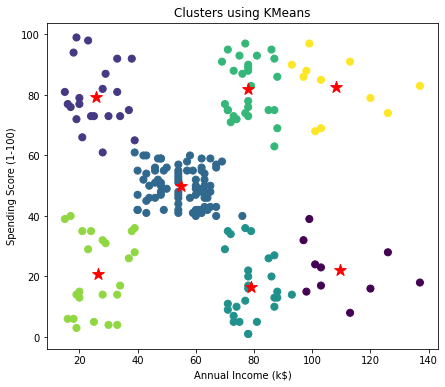

In [ ]:
fig = plt.figure(figsize=(7, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_kmean7, s=50)

centers = kmean7.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, marker='*')
plt.title('Clusters using KMeans')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
df['Class_with_K7'] = kmean7.predict(x)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Class,Class_with_K3,Class_with_K7
0,1,Male,19,15,39,4,1,5
1,2,Male,21,15,81,2,1,1
2,3,Female,20,16,6,4,1,5
3,4,Female,23,16,77,2,1,1
4,5,Female,31,17,40,4,1,5


In [ ]:
df['Class_with_K7'].value_counts()

2    79
4    28
3    27
5    23
1    22
6    11
0    10
Name: Class_with_K7, dtype: int64